In [5]:
#importing necessary libraries
import pandas as pd
import numpy as np
# plotting
import matplotlib.pyplot as plt
#opening data
import warnings
#used for plots
from mplsoccer import Pitch, VerticalPitch

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [3]:
fk_cross = pd.read_csv("fk_cross_xT.csv")
passes = pd.read_csv("passes_xT.csv")
prepared_chains = pd.read_csv("prepared_chains.csv")

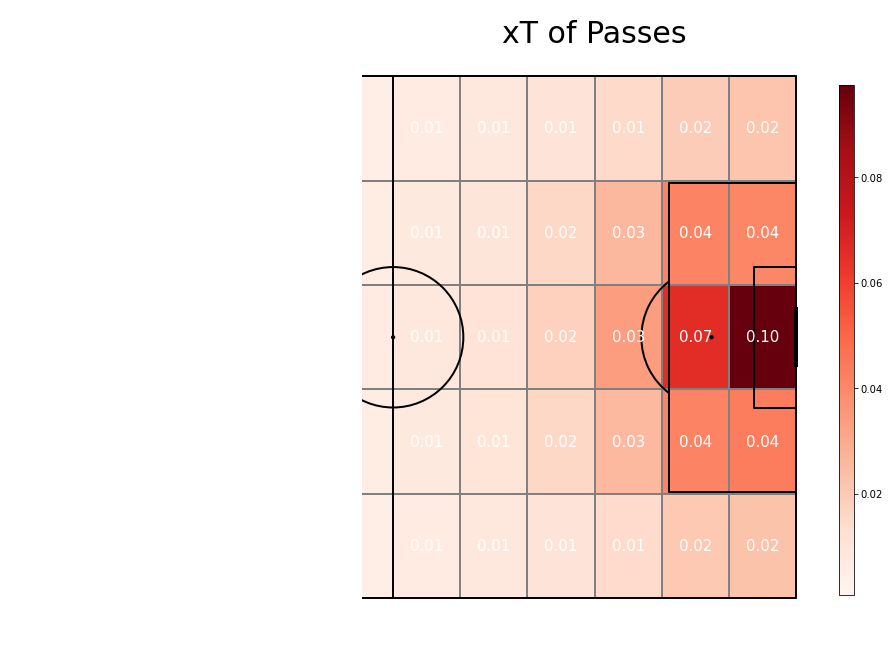

In [30]:
pitch = Pitch(line_color='black',pitch_type='custom', half=True, pitch_length=105, pitch_width=68, line_zorder = 2)
passing = pitch.bin_statistic(passes["x0"], passes["y0"], values=passes["xT"], statistic='mean', bins=(12, 5), normalize=False)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(passing, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
labels = pitch.label_heatmap(passing, color='white', fontsize=15,
                             ax=ax['pitch'], ha='center', va='center', str_format="{0:,.2f}", zorder = 3)
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('xT of Passes', fontsize = 30)
plt.show()

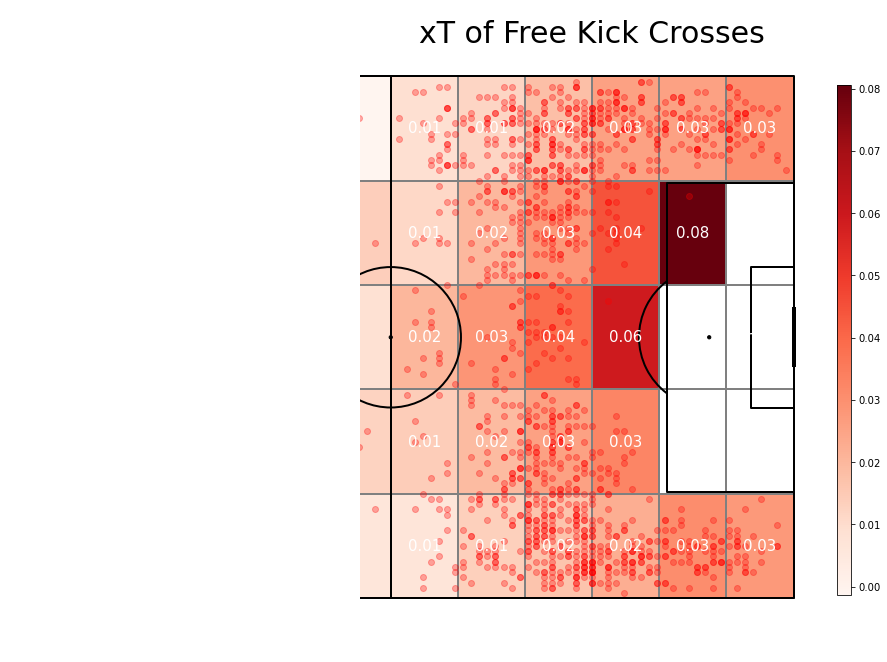

In [31]:
fk_crossing = pitch.bin_statistic(fk_cross["x0"], fk_cross["y0"], values=fk_cross["xT"], statistic='mean', bins=(12, 5), normalize=False)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(fk_crossing, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
sc = pitch.scatter(fk_cross.x0, fk_cross.y0, color="r", alpha = 0.3, ax = ax['pitch'])
labels = pitch.label_heatmap(fk_crossing, color='white', fontsize=15,
                             ax=ax['pitch'], ha='center', va='center', str_format="{0:,.2f}", zorder = 3)
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('xT of Free Kick Crosses', fontsize = 30)
plt.show()

In [32]:
xt_diff = np.nan_to_num(fk_crossing["statistic"])-passing["statistic"]
fk_crossing["statistic"] = xt_diff

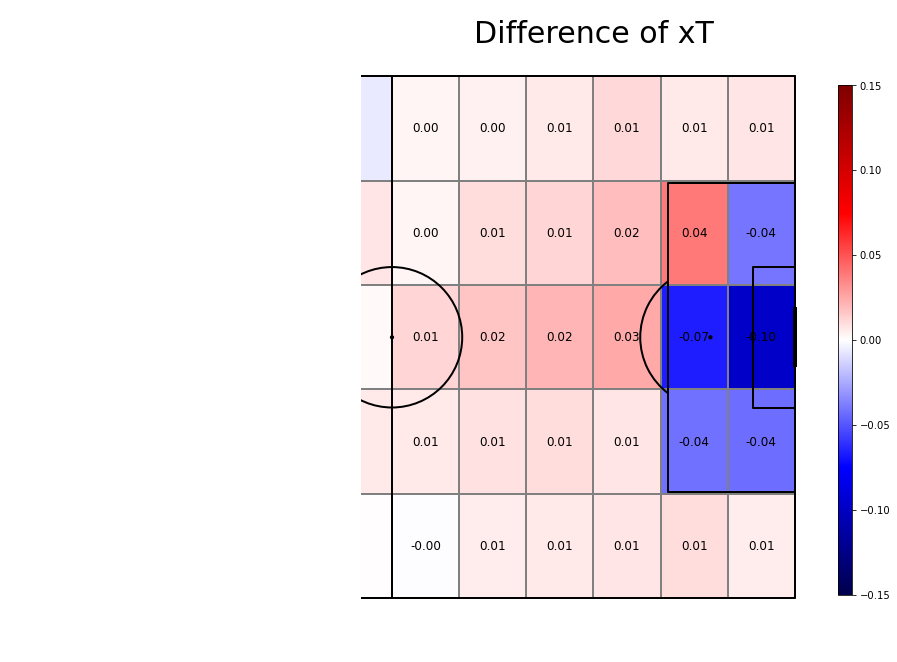

In [47]:
from matplotlib import colors

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(fk_crossing, cmap='seismic', edgecolor='grey',norm=colors.TwoSlopeNorm(vmin= -0.15,vcenter=0., vmax=0.15 ), ax=ax['pitch'])
labels = pitch.label_heatmap(fk_crossing, color='black', fontsize=12,
                             ax=ax['pitch'], ha='center', va='center', str_format="{0:,.2f}", zorder = 3)
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Difference of xT', fontsize = 30)
plt.show()

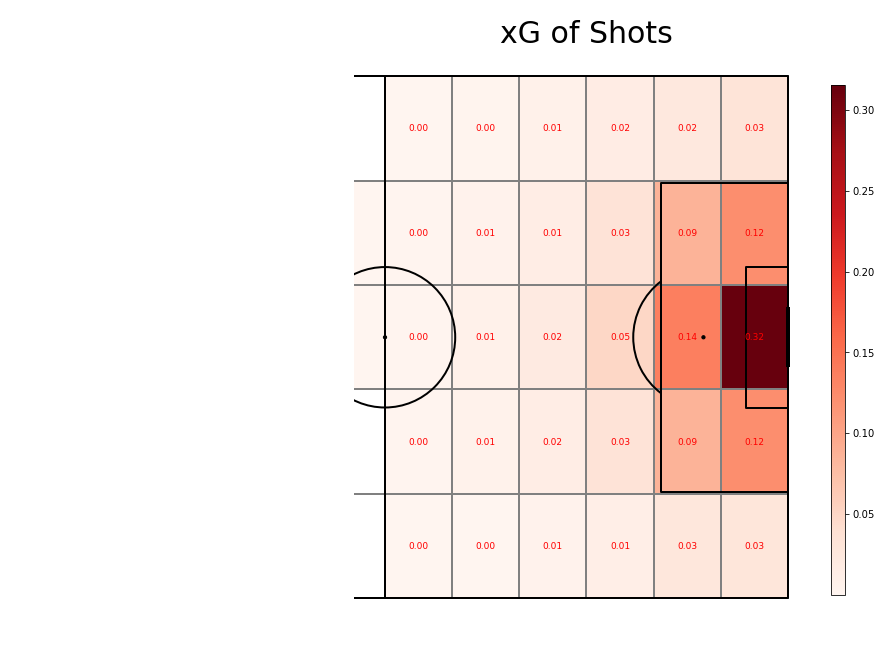

In [36]:
shots = prepared_chains.loc[prepared_chains["eventName"] == "Shot"]
shooting = pitch.bin_statistic(shots["x0"], shots["y0"], values=shots["xG"], statistic='mean', bins=(12, 5), normalize=False)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(shooting, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
labels = pitch.label_heatmap(shooting, color='red', fontsize=9,
                             ax=ax['pitch'], ha='center', va='center', str_format="{0:,.2f}", zorder = 3)
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('xG of Shots', fontsize = 30)
plt.show()

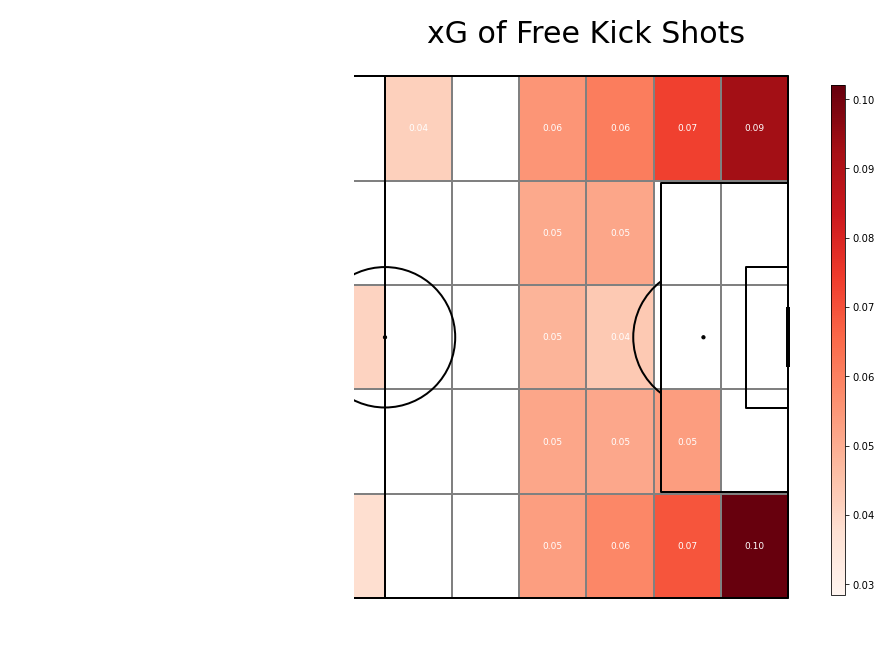

In [38]:
set_pieces = prepared_chains.loc[prepared_chains["subEventName"] == "Free kick shot"]
set_piece_shots = pitch.bin_statistic(set_pieces["x0"], set_pieces["y0"], values=set_pieces["xG"], statistic='mean', bins=(12, 5), normalize=False)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(set_piece_shots, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
labels = pitch.label_heatmap(set_piece_shots, color='white', fontsize=9,
                             ax=ax['pitch'], ha='center', va='center', str_format="{0:,.2f}", zorder = 3)
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('xG of Free Kick Shots', fontsize = 30)
plt.show()

In [39]:
xg_diff = np.nan_to_num(set_piece_shots["statistic"])-np.nan_to_num(shooting["statistic"])
shooting["statistic"] = xg_diff

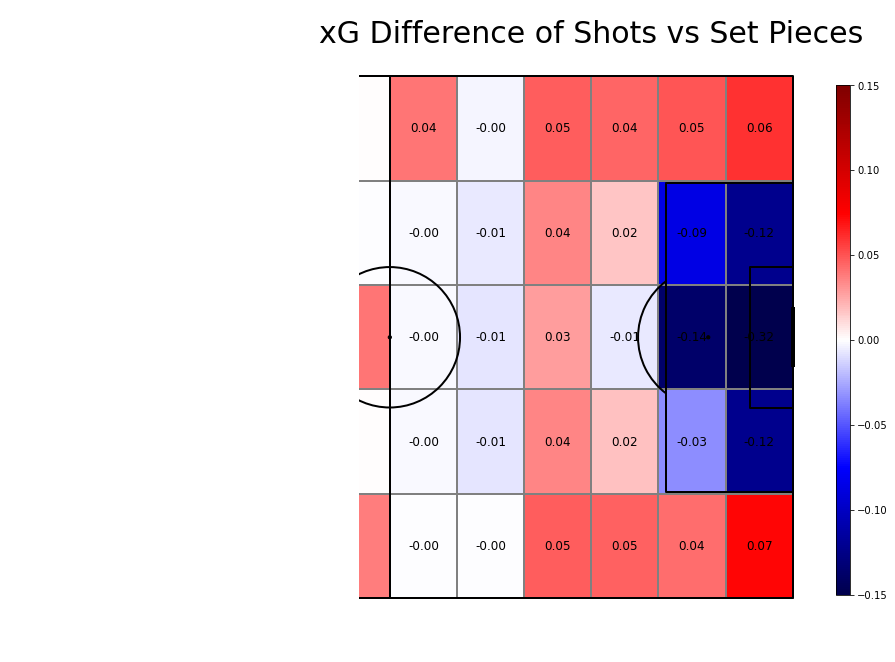

In [46]:
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(shooting, cmap='seismic', edgecolor='grey',norm=colors.TwoSlopeNorm(vmin= -0.15,vcenter=0., vmax=0.15 ), ax=ax['pitch'])
labels = pitch.label_heatmap(shooting, color='black', fontsize=12,
                             ax=ax['pitch'], ha='center', va='center', str_format="{0:,.2f}", zorder = 3)
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('xG Difference of Shots vs Set Pieces', fontsize = 30)
plt.show()

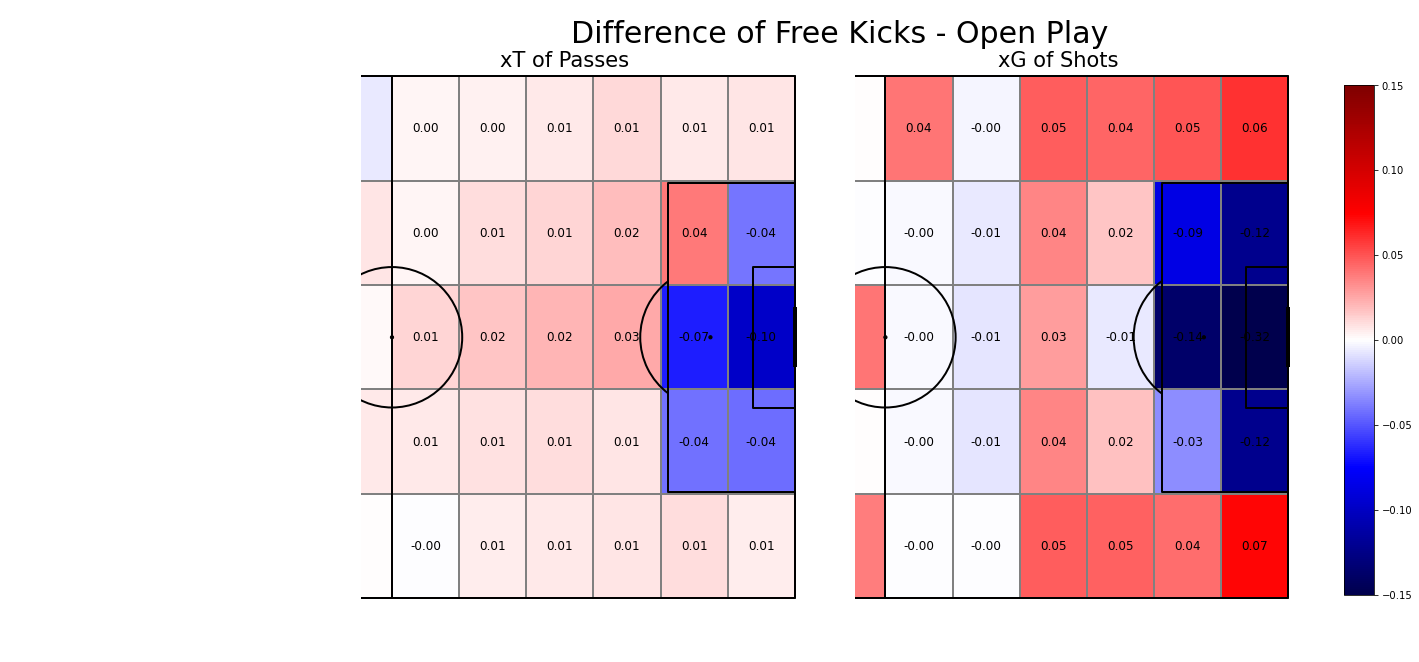

In [89]:
fig, ax = pitch.grid(ncols=2, grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(fk_crossing, cmap='seismic', edgecolor='grey',norm=colors.TwoSlopeNorm(vmin= -0.15,vcenter=0., vmax=0.15 ), ax=ax['pitch'][0])
labels = pitch.label_heatmap(fk_crossing, color='black', fontsize=12,
                             ax=ax['pitch'][0], ha='center', va='center', str_format="{0:,.2f}", zorder = 3)
pcm  = pitch.heatmap(shooting, cmap='seismic', edgecolor='grey',norm=colors.TwoSlopeNorm(vmin= -0.15,vcenter=0., vmax=0.15 ), ax=ax['pitch'][1])
labels = pitch.label_heatmap(shooting, color='black', fontsize=12,
                             ax=ax['pitch'][1], ha='center', va='center', str_format="{0:,.2f}", zorder = 3)
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Difference of Free Kicks - Open Play', fontsize = 30)
title = pitch.annotate("xT of Passes",(75,70), fontsize=21, ha='center', va='center', ax = ax['pitch'][0])
title = pitch.annotate("xG of Shots",(75,70), fontsize=21, ha='center', va='center', ax = ax['pitch'][1])
plt.savefig("Freekick_openplay.png", bbox_inches="tight")
plt.show()

In [90]:
prepared_chains.loc[prepared_chains["eventName"] == "Duel"]

,Unnamed: 0,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,...,possesion_chain,possesion_chain_team,xG,shot_end,x0,c0,x1,c1,y0,y1
6,8,1,Air duel,"[{'id': 703}, {'id': 1801}]",0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",2499719,Duel,1609,1H,...,1,1609,0.000000,0,64.05,23.80,70.35,20.40,10.20,13.60
17,22,1,Ground loose ball duel,"[{'id': 703}, {'id': 1801}]",12829,"[{'y': 22, 'x': 67}, {'y': 15, 'x': 71}]",2499719,Duel,1631,1H,...,2,1631,0.000000,0,70.35,19.04,74.55,23.80,53.04,57.80
21,30,1,Ground attacking duel,"[{'id': 503}, {'id': 703}, {'id': 1801}]",7945,"[{'y': 51, 'x': 44}, {'y': 46, 'x': 55}]",2499719,Duel,1609,1H,...,3,1609,0.137573,1,46.20,0.68,57.75,2.72,33.32,36.72
22,31,1,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",7945,"[{'y': 46, 'x': 55}, {'y': 44, 'x': 64}]",2499719,Duel,1609,1H,...,3,1609,0.137573,1,57.75,2.72,67.20,4.08,36.72,38.08
23,34,1,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",7945,"[{'y': 44, 'x': 64}, {'y': 52, 'x': 64}]",2499719,Duel,1609,1H,...,3,1609,0.137573,1,67.20,4.08,67.20,1.36,38.08,32.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435260,643098,1,Ground loose ball duel,"[{'id': 703}, {'id': 1801}]",8245,"[{'y': 85, 'x': 38}, {'y': 82, 'x': 41}]",2500098,Duel,1623,2H,...,113648,1623,0.000000,0,39.90,23.80,43.05,21.76,10.20,12.24
435270,643112,1,Ground attacking duel,"[{'id': 504}, {'id': 703}, {'id': 1801}]",14703,"[{'y': 94, 'x': 68}, {'y': 93, 'x': 70}]",2500098,Duel,1633,2H,...,113650,1633,0.000000,0,71.40,29.92,73.50,29.24,4.08,4.76
435272,643115,1,Ground attacking duel,"[{'id': 703}, {'id': 1801}]",14703,"[{'y': 65, 'x': 93}, {'y': 66, 'x': 93}]",2500098,Duel,1633,2H,...,113651,1633,0.000000,0,97.65,10.20,97.65,10.88,23.80,23.12
435273,643116,1,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",14703,"[{'y': 66, 'x': 93}, {'y': 72, 'x': 95}]",2500098,Duel,1633,2H,...,113651,1633,0.000000,0,97.65,10.88,99.75,14.96,23.12,19.04
